In [1]:
#Importing and Working On The New Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
#%matplotlib inline
data=pd.read_csv('headbrain.csv')
data.head(n=20)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [2]:
#Describing The Data
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [3]:
#Normalizing The Data
data=((data-data.mean())/data.std())
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,-0.874879,-1.072228,2.403781,2.053562
1,-0.874879,-1.072228,0.284751,0.117388
2,-0.874879,-1.072228,1.716602,0.433159
3,-0.874879,-1.072228,0.391524,-0.007258
4,-0.874879,-1.072228,1.486630,2.552148


In [4]:
#Now Importing The Individual Columns
gender=data['Gender'].values
ageRange=data['Age Range'].values
headSize=data['Head Size(cm^3)'].values
brainWeight=data['Brain Weight(grams)'].values
m=len(brainWeight)
X0=np.ones(m)
X=np.array([X0,gender,ageRange,headSize]).T
Y=np.array(brainWeight)
theta=np.array([0,0,0,0])

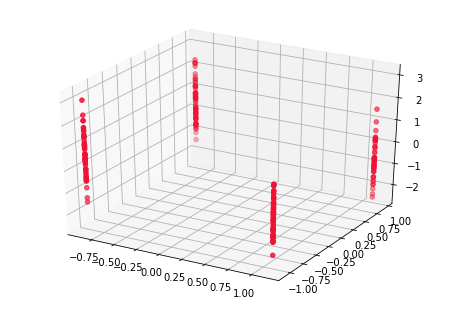

In [5]:
#Plotting The Data
from mpl_toolkits.mplot3d import Axes3D
fig = mpl.figure()
ax = Axes3D(fig)
ax.scatter(gender,ageRange, headSize, color='#ef1234')
mpl.show()

In [6]:
#Now Defining The Cost Function
iters=100000000
alpha=0.0003
def computeCost(X,Y,theta):
    inner = np.sum(((X.dot(theta)-Y))**2)/(2*m)
    return inner

In [7]:
computeCost(X,Y,theta)

0.4978902953586495

In [8]:
#Now Defining The Gradient Descent Here
def gradientDescent(X,Y,theta,alpha,iters):
    costHistory=[0]*iters
    for iterations in range(iters):
        hypothesis=X.dot(theta)
        #Error Function
        error=hypothesis-Y
        #the Gradient
        gradient=X.T.dot(error)/m
        #Now Theta Will Be
        theta=theta-alpha*gradient
        #New Cost
        newCost=computeCost(X,Y,theta)
        costHistory[iterations]=newCost
    return costHistory,theta


In [9]:
newCost,newTheta=gradientDescent(X,Y,theta,alpha,100000)
print(newCost[-1])
print(newTheta)

0.1728502642498042
[-2.84079933e-16 -9.30567074e-02 -9.95398307e-02  7.41239423e-01]
